## Project02_Titanic
**参考：**
1.    [kaggle](https://www.kaggle.com/c/titanic/data)
2.    [seaborn](https://seaborn.pydata.org/)
3.    [git](https://git-scm.com/book/zh/v2)
4.    [matplotlib](https://matplotlib.org/)
5.    [Free Statistics Calculators](http://www.danielsoper.com/statcalc/calculator.aspx?id=10)

### 1. 项目总览
数据集包含了泰坦尼克号于1912年4月15沉没时891名乘客的样本，其中所知信息有：
*    乘客ID
*    是否存活
*    船舱等级
*    姓名
*    性别
*    年龄
*    兄弟姐妹、配偶（差不多岁数）数量
*    父母、子女（上下各一个辈分）数量
*    船费
*    船舱号
*    登船港口


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
sns.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


In [43]:
df = pd.read_csv(r'd:\下载\titanic-data.csv')

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 数据清理
查看数据集时，发现年龄与船舱列有NaN值，先使用fillna填充

In [84]:
def fill_na(df, column_name):
    return df[column_name].fillna(0, inplace=True)#原地修改DataFrame

fill_na(df, 'Age')
fill_na(df, 'Cabin')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


### 3. 项目数据问题

#### 3.1 乘客相关单变量：
1.    乘客年龄分布
2.    乘客性别分布

#### 3.2 多变量
1.    乘客性别与是否生存的关系
2.    乘客所在船舱与是否生存的关系

### 4. 探索数据 

#### 4.1 乘客年龄分布

In [99]:
import math
new_df = df.loc[df['Age'] !=0]
new_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


E:\Program Files (x86)\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


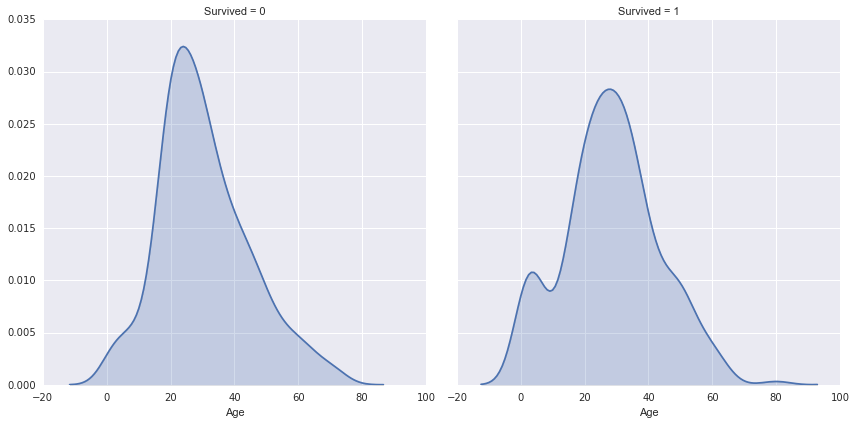

In [100]:
g_age=sns.FacetGrid(new_df,col='Survived',size=6)
g_age.map(sns.kdeplot,'Age',shade=True)
# 生成关于年龄的核概率估计图标

#### 4.2 乘客性别分布

In [127]:
age_df = df[['Survived', 'Sex']].groupby('Sex').count().unstack()
age_df

          Sex   
Survived  female    314
          male      577
dtype: int64

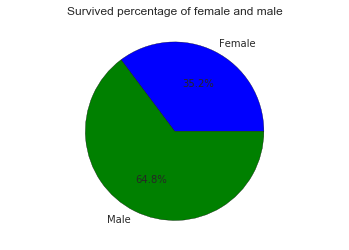

In [155]:
labels = ['Female', 'Male']
plt.axis('equal')
plt.pie(age_df, labels=labels, autopct='%1.1f%%')
plt.title(u'Survived percentage of female and male')
plt.show()

#### 4.3 男女生存比例

In [156]:
sex_df = pd.crosstab(df['Sex'], df['Survived']) #形成性别与生存的交叉表
print(sex_df)

Survived    0    1
Sex               
female     81  233
male      468  109


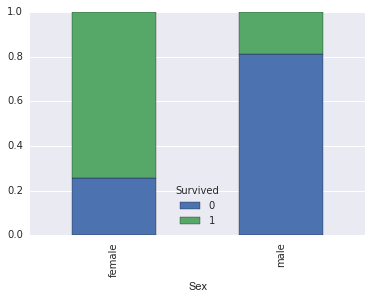

In [160]:
sex_df.div(sex_df.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

#### 4.4 船舱与生存比例

In [161]:
pclass_df = pd.crosstab(df['Pclass'], df['Survived'])
print(pclass_df)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


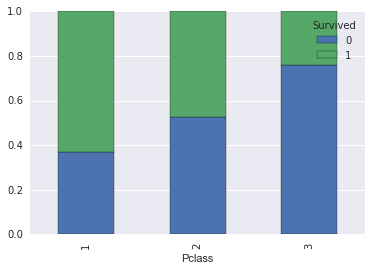

In [186]:
pclass_df.div(pclass_df.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

### 5. 统计学推论

In [210]:
def df_summary(df, columnname):
    print('乘客平均生还率如下:\n%r'% (df['Survived'].groupby(df[columnname]).mean()))
    print('乘客总人数如下:\n%r'% (df['Survived'].groupby(df[columnname]).count()))
    print('乘客生还率标准偏差如下:\n%r'% (df['Survived'].groupby(df[columnname]).std()))
    print('乘客生还率方差如下:\n%r'% (df['Survived'].groupby(df[columnname]).var()))

In [211]:
df_summary(df, 'Sex')

乘客平均生还率如下:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
乘客总人数如下:
Sex
female    314
male      577
Name: Survived, dtype: int64
乘客生还率标准偏差如下:
Sex
female    0.438211
male      0.391775
Name: Survived, dtype: float64
乘客生还率方差如下:
Sex
female    0.192029
male      0.153488
Name: Survived, dtype: float64


零假设:女性生存率不比男性高
$$H_0:\mu_f\leq\mu_m$$
备择假设:女性生存率高于男性
$$H_0:\mu_f>\mu_m$$
独立样本t检验，单尾正方向
$$\alpha=0.05,$$
描述统计量：
$$\overline{x}_f=0.74,n_f=314,df_f=313,SD_f=0.44,SS_f=0.19$$
$$\overline{x}_m=0.19,n_m=577,df_m=576,SD_m=0.39,SS_m=0.15$$
合并方差：
$$S_{p}^2=\frac{SS_f+SS_m}{df_f+df_m}=0.00038
$$
标准误差：
$$SE=\sqrt{\frac{S_{p}^2}{n_f}+\frac{S_{p}^2}{n_m}}=0.0014$$
t统计值：
$$t_statistic=\frac{\overline{x}_f-\overline{x}_m}{SE}=392.86$$
根据计算器计算t临界值:
$$t_{critical}=1.647$$
因此t统计值远大于t临界值，所以拒绝零假设，女性生还率显著高于男性


### 6.结论说明
1.    此份数据为总体的一部分样本，不能代表所有船员，推论有一定偏差
2.    部分数据缺失，导致部分统计结论误差加大
3.    本次调查属于观察性研究，不是实验研究